### How would one predict macro trends for Crypto currencies? 

### Sentiment? Keywords? 

### Step 1 get sentiment analysis for Bitcoin

In [3]:
import pandas as pd
df = pd.read_csv(r"./bitcoinFearGreedIndex.csv")

# Clean up data
df = df.drop(columns='Unnamed: 1')
df = df.drop(columns='Unnamed: 2')
df = df.drop(columns='Unnamed: 3')
df = df.drop(columns='Unnamed: 4')
df = df.drop(columns='Unnamed: 5')
df = df.drop(df.tail(5).index)

# Renaming columns 
df = df.rename(columns={'Unnamed: 0': 'c1'})
df

,c1
0,"01-24-2022,"
1,"13,Extreme Fear"
2,"01-23-2022,"
3,"11,Extreme Fear"
4,"01-22-2022,"
...,...
2897,"40,Fear"
2898,"02-02-2018,"
2899,"15,Extreme Fear"
2900,"02-01-2018,"


### Split dataframe into two columns

In [4]:
df = pd.DataFrame(df.c1.values.reshape(-1,2),columns=['c2','c3'])
df = df.rename(columns={'c2': 'date'})
df = df.rename(columns={'c3': 'sentiment'})
df

,date,sentiment
0,"01-24-2022,","13,Extreme Fear"
1,"01-23-2022,","11,Extreme Fear"
2,"01-22-2022,","13,Extreme Fear"
3,"01-21-2022,","19,Extreme Fear"
4,"01-20-2022,","24,Extreme Fear"
...,...,...
1446,"02-05-2018,","11,Extreme Fear"
1447,"02-04-2018,","24,Extreme Fear"
1448,"02-03-2018,","40,Fear"
1449,"02-02-2018,","15,Extreme Fear"


### strip the words from C2

In [5]:
df['sentiment'] = df['sentiment'].str[0:2]
df = df.replace(',','', regex=True)
df['sentiment'] = pd.to_numeric(df['sentiment'])
df

,date,sentiment
0,01-24-2022,13
1,01-23-2022,11
2,01-22-2022,13
3,01-21-2022,19
4,01-20-2022,24
...,...,...
1446,02-05-2018,11
1447,02-04-2018,24
1448,02-03-2018,40
1449,02-02-2018,15


#### Add btc price 

In [6]:
btcPrice = pd.read_csv(r"./bitcoinPrice.csv")
btcPrice = btcPrice.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'])

#### Merge BTC prices with dataframe    

In [7]:
df.date = pd.to_datetime(df.date)
btcPrice.Date = pd.to_datetime(btcPrice.Date)
btcPrice = btcPrice.rename(columns={'Date': 'date'})
btcPrice = btcPrice.rename (columns={'Close': 'price'})
df = pd.merge(btcPrice, df, how='outer', on='date')
df = df.dropna()
df

,date,price,sentiment
1233,2018-02-01,9170.540039,30.0
1234,2018-02-02,8830.750000,15.0
1235,2018-02-03,9174.910156,40.0
1236,2018-02-04,8277.009766,24.0
1237,2018-02-05,6955.270020,11.0
...,...,...,...
2682,2022-01-20,40680.417969,24.0
2683,2022-01-21,36457.316406,19.0
2684,2022-01-22,35030.250000,13.0
2685,2022-01-23,36276.804688,11.0


#### Intersect both graphs over each other 

Text(0, 0.5, 'avgSentiment')

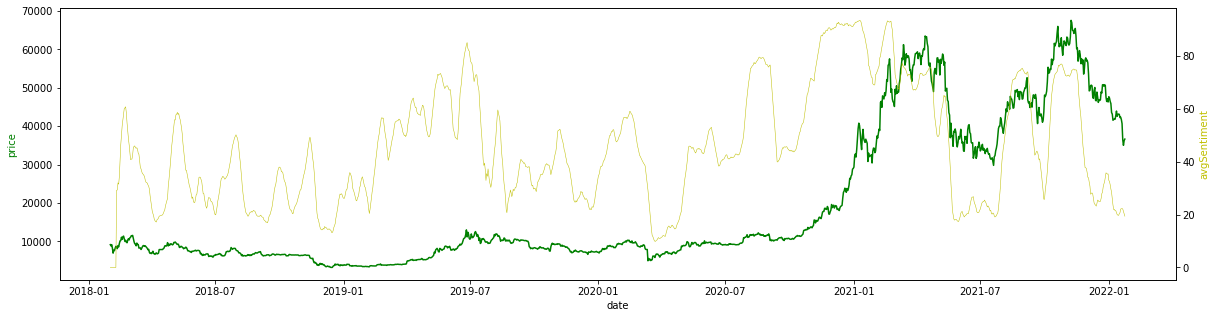

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# slicing function
# df = df.iloc[np.r_[0:1000]]

def trailingAverage(df, n):
    df['avgSentiment'] = df['sentiment'].rolling(n).mean()
    return df

def replaceNaN(x):
    for i in range(len(x)):
        if np.isnan(x[i]):
            x[i] = 0
    return x

def turnNumbersToPerecentes(x):
    for i in range(len(x)):
        x[i] = ("{:.2%}".format( x[i]/ 100)) 

    return x

date = df['date'].tolist()
sentiment = df['sentiment'].tolist()
price = df['price'].tolist()
avgSentiment = trailingAverage(df, 10)['avgSentiment'].tolist()
avgSentiment = replaceNaN(avgSentiment)

# avgSentiment = turnNumbersToPerecentes(avgSentiment)

# correlation = df['price'].corr(df['avgSentiment'])
# correlation = ("{:.2%}".format(correlation))
# correlation

plt.rcParams["figure.figsize"] = (20,5) 

x = np.arange(0, 10, 0.1) 
y1 = 0.05 * x**2 
y2 = -1 *y1 

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax1.plot(date, price, 'g-') 
ax2.plot(date, avgSentiment, 'y-', linewidth=.5) 

ax1.set_xlabel('date') 
ax1.set_ylabel('price', color='green') 
ax2.set_ylabel('avgSentiment', color='y') 

### What is the overlay of CryptoCurrency from Google trends with BTC

In [9]:
googleTrends = pd.read_csv(r"./bitcoinGoogleTrends.csv")

googleTrends = googleTrends.rename(columns={'Month': 'date'})
googleTrends = googleTrends.rename(columns={'bitcoin: (Worldwide)': 'searches'})

savedGoogleTrends = googleTrends
googleTrends

,date,searches
0,2004-01,0
1,2004-02,0
2,2004-03,0
3,2004-04,0
4,2004-05,0
...,...,...
215,2021-12,35
216,2022-01,38
217,2022-02,34
218,2022-03,29


### Combine googleTrends with dataframe

In [10]:
df.date = pd.to_datetime(df.date)
googleTrends.date = pd.to_datetime(googleTrends.date)
df = pd.merge(googleTrends, df, how='outer', on='date')
df = df.dropna()

df

,date,searches,price,sentiment,avgSentiment
170,2018-03-01,23,10951.000000,38.0,43.5
171,2018-04-01,18,6844.229980,16.0,23.1
172,2018-05-01,14,9119.009766,56.0,48.4
173,2018-06-01,13,7541.450195,24.0,24.5
174,2018-07-01,13,6385.819824,27.0,20.0
175,2018-08-01,12,7624.910156,39.0,49.5
176,2018-09-01,12,7193.250000,21.0,19.4
177,2018-10-01,10,6589.620117,35.0,38.0
178,2018-11-01,14,6377.779785,29.0,29.5
179,2018-12-01,13,4214.671875,13.0,14.2


### Plot the chart

Text(0, 0.5, 'searches')

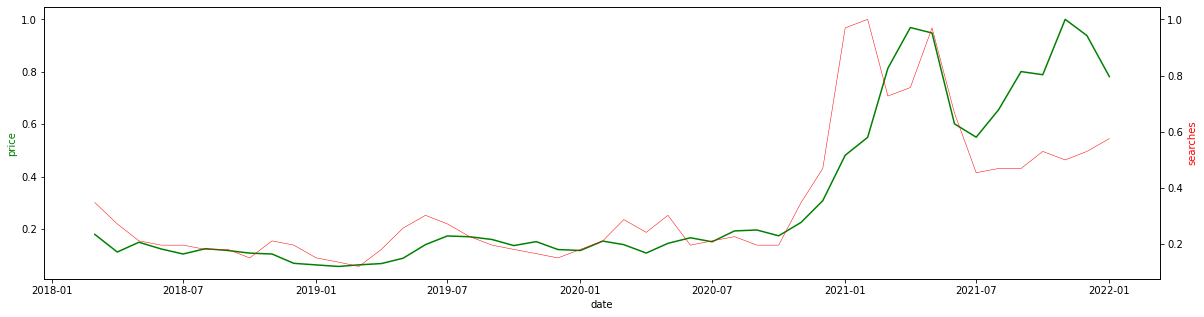

In [11]:
### Functions

def turnFloatToInt(x):
    for i in range(len(x)):
        x[i] = int(x[i])
    return x

def normalizeDataToOne(x):
    max = findMax(x)
    for i in range(len(x)):
        x[i] = x[i] / max
    return x

### Helper functions
def findMax(x):
    max = 0
    for i in range(len(x)):
        if x[i] > max:
            max = x[i]
    return max

###############################################################################################
date = df['date'].tolist()

price = turnFloatToInt(df['price'].tolist())
price = normalizeDataToOne(price)
sentiment = turnFloatToInt(df['sentiment'].tolist())
sentiment = normalizeDataToOne(sentiment)
searches = turnFloatToInt(df['searches'].tolist())
searches = normalizeDataToOne(searches)

###############################################################################################
# plt.rcParams["figure.figsize"] = (20,5) 

# def threeLinePlot(x, y1, y2, y3):
#     plt.plot(x, y1, 'g-', linewidth=.5)
#     plt.plot(x, y2, 'r-', linewidth=.5)
#     # plt.plot(x, y3, 'y-', linewidth=.5)
#     plt.xlabel('date')

#     plt.ylabel('price/searches scaled to 1', color='black')
#     plt.legend(['price', 'searches'])
#     plt.show()

# threeLinePlot(date, price, searches, sentiment)

plt.rcParams["figure.figsize"] = (20,5) 

x = np.arange(0, 10, 0.1) 
y1 = 0.05 * x**2 
y2 = -1 *y1 

fig, ax1 = plt.subplots() 

ax2 = ax1.twinx() 
ax1.plot(date, price, 'g-') 
ax2.plot(date, searches, 'r-', linewidth=.5) 

ax1.set_xlabel('date') 
ax1.set_ylabel('price', color='green') 
ax2.set_ylabel('searches', color='r')